In [22]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [61]:
#loading data
alldata = pd.read_csv('C:\\Users\\AHMED\\Documents\\geology\\andymcdge\\Petrophysics-Python-Series-master\\Petrophysics-Python-Series-master\\Data\\xeek_train_subset.csv')

In [62]:
alldata

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528000,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680000,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832000,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984000,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136000,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,476770.12500,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,22.291321,NaN,NaN,0.107520,NaN,NaN,NaN,NaN,30000,2.0
133194,16/2-16,2207.462396,476770.15625,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,22.230320,NaN,NaN,0.101821,NaN,NaN,NaN,NaN,30000,2.0
133195,16/2-16,2207.614396,476770.15625,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,22.388054,NaN,NaN,0.097832,NaN,NaN,NaN,NaN,30000,2.0
133196,16/2-16,2207.766396,476770.15625,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,23.331690,NaN,NaN,0.092334,NaN,NaN,NaN,NaN,30000,2.0


In [63]:
alldata['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16'], dtype=object)

In [64]:
alldata['WELL'].nunique()

12

In [65]:
# select well data 16/10-1
data = alldata[alldata['WELL'] == '16/10-1'][['DEPTH_MD', 'GR', 'RHOB', 'NPHI', 'FORCE_2020_LITHOFACIES_LITHOLOGY']]

In [66]:
data.rename(columns= {'FORCE_2020_LITHOFACIES_LITHOLOGY':'LITHOLOGY'}, inplace =True)

In [67]:
data

,DEPTH_MD,GR,RHOB,NPHI,LITHOLOGY
58694,439.41579,51.431892,NaN,NaN,65030
58695,439.56779,49.472492,NaN,NaN,65030
58696,439.71979,50.167278,NaN,NaN,65030
58697,439.87179,46.572552,NaN,NaN,65030
58698,440.02379,48.498447,NaN,NaN,65030
...,...,...,...,...,...
76364,3125.25579,58.311066,2.728782,0.021273,65000
76365,3125.40779,61.116467,2.810545,0.006249,65000
76366,3125.55979,62.097778,2.895227,-0.000931,65000
76367,3125.71179,57.081661,2.939643,-0.004300,65000


In [68]:
data.shape

(17675, 5)

In [69]:
data.size

88375

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17675 entries, 58694 to 76368
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPTH_MD   17675 non-null  float64
 1   GR         17675 non-null  float64
 2   RHOB       11273 non-null  float64
 3   NPHI       11431 non-null  float64
 4   LITHOLOGY  17675 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 828.5 KB


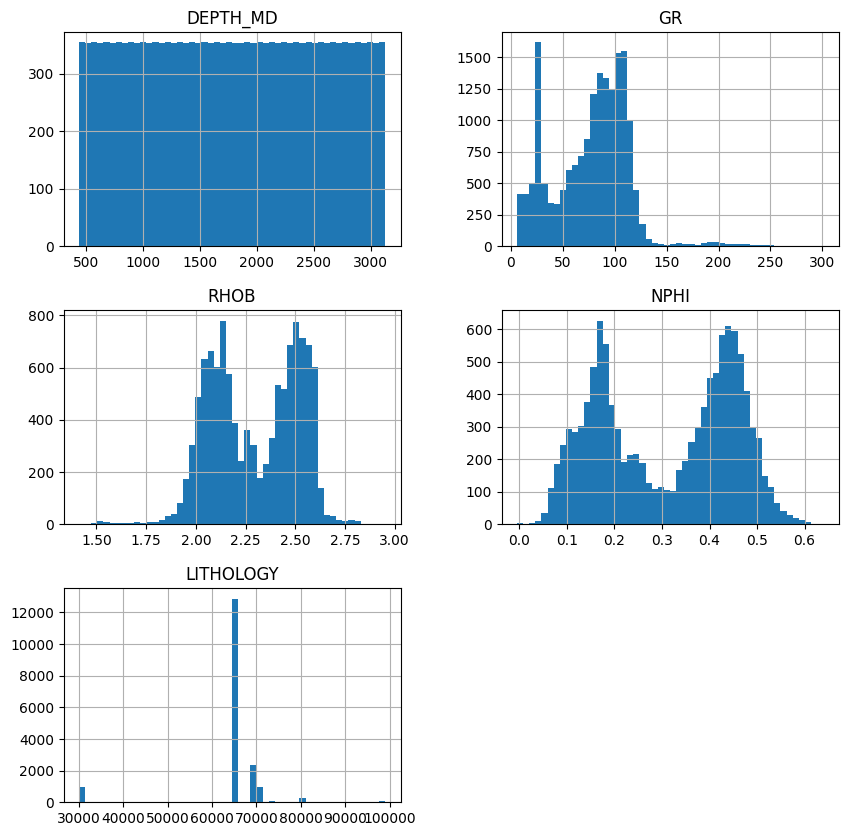

In [18]:
data.hist(bins=50,figsize=(10,10))
plt.show()

In [71]:
#calculate skewness
skew = data.skew()
skew

DEPTH_MD     2.977674e-11
GR           3.327507e-01
RHOB        -1.714857e-01
NPHI        -1.176242e-01
LITHOLOGY   -2.476231e+00
dtype: float64

In [72]:
#Define  null value
data.isnull().sum()

DEPTH_MD        0
GR              0
RHOB         6402
NPHI         6244
LITHOLOGY       0
dtype: int64

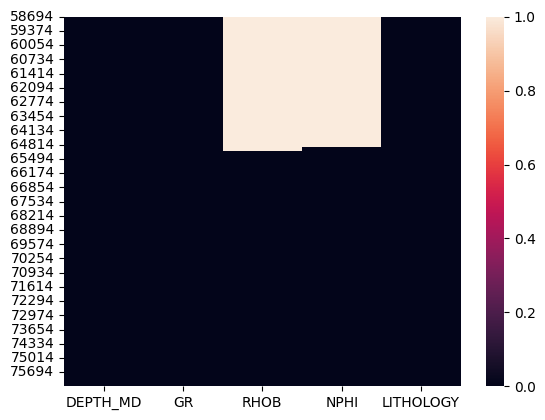

In [73]:
sns.heatmap(data.isnull())
plt.show()

<AxesSubplot: >

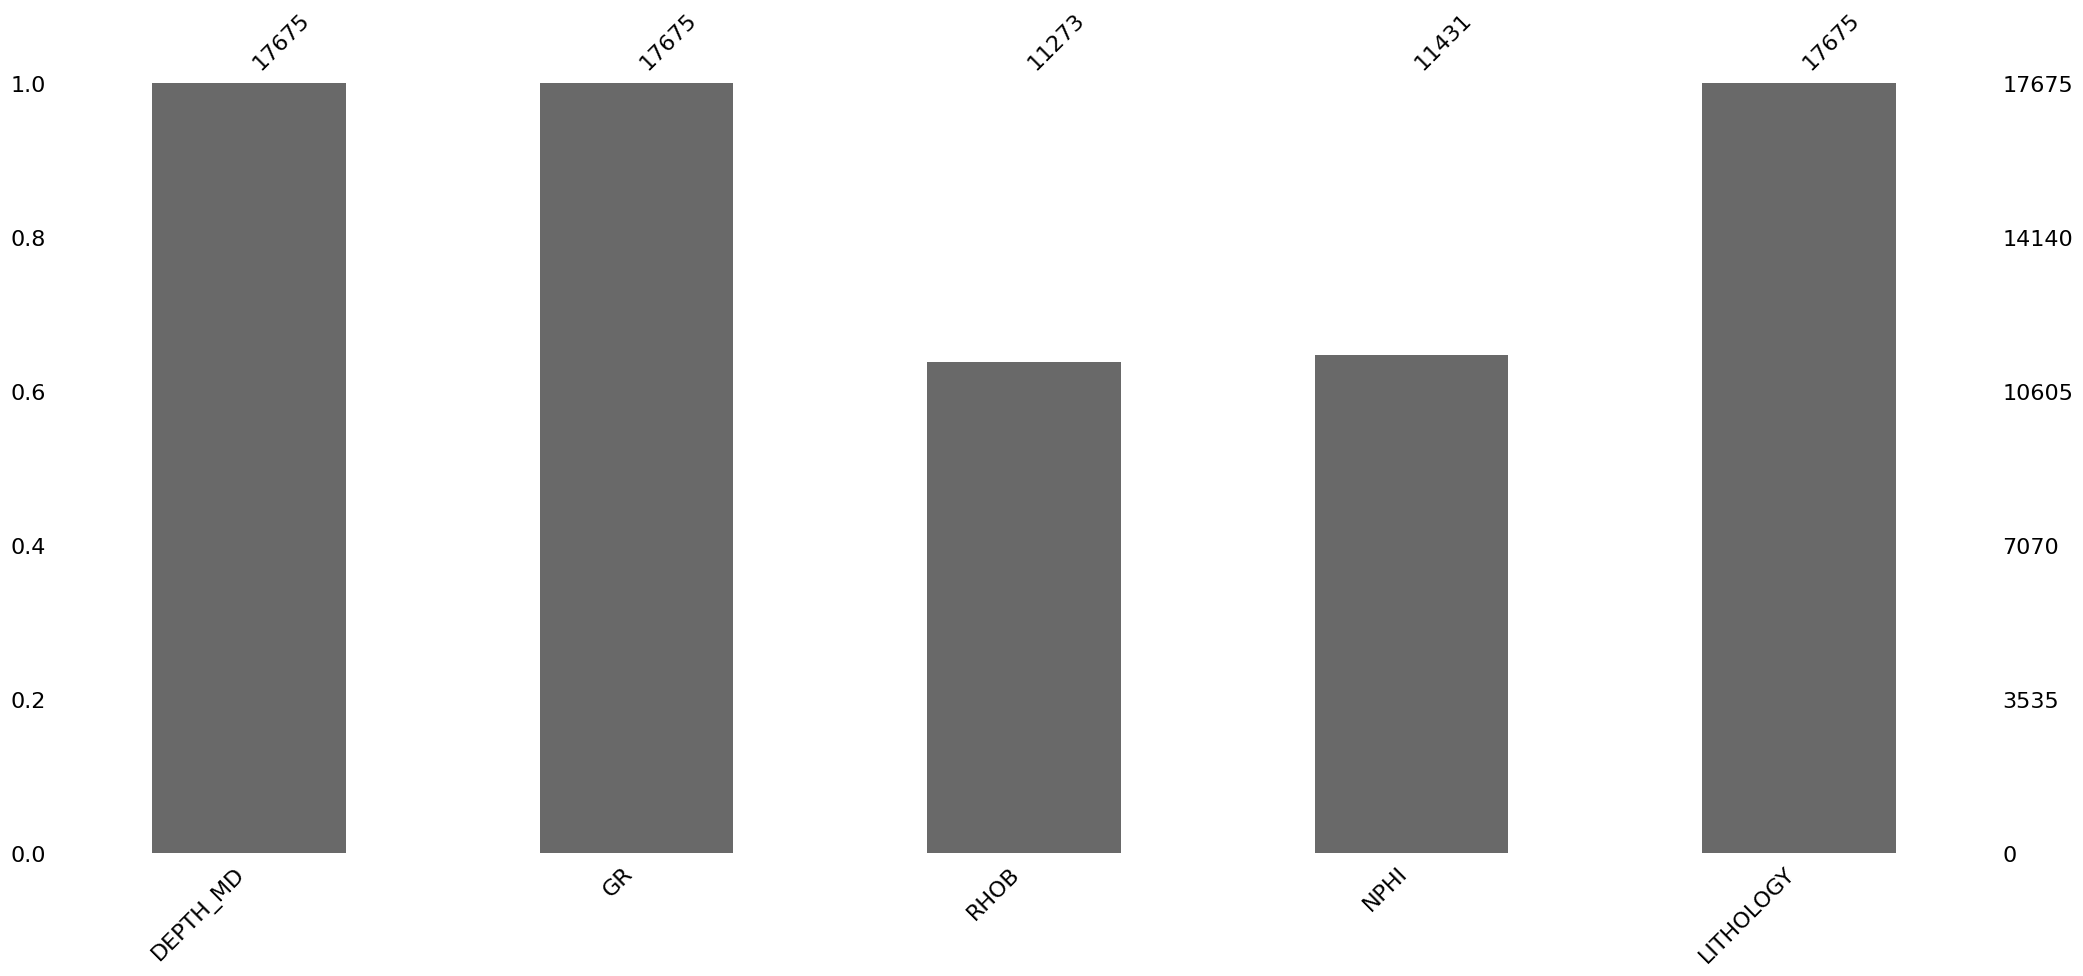

In [74]:
#Bar Chart show >>>  data of each column  and how many null values are present 
import missingno as msno
msno.bar(data)

<AxesSubplot: >

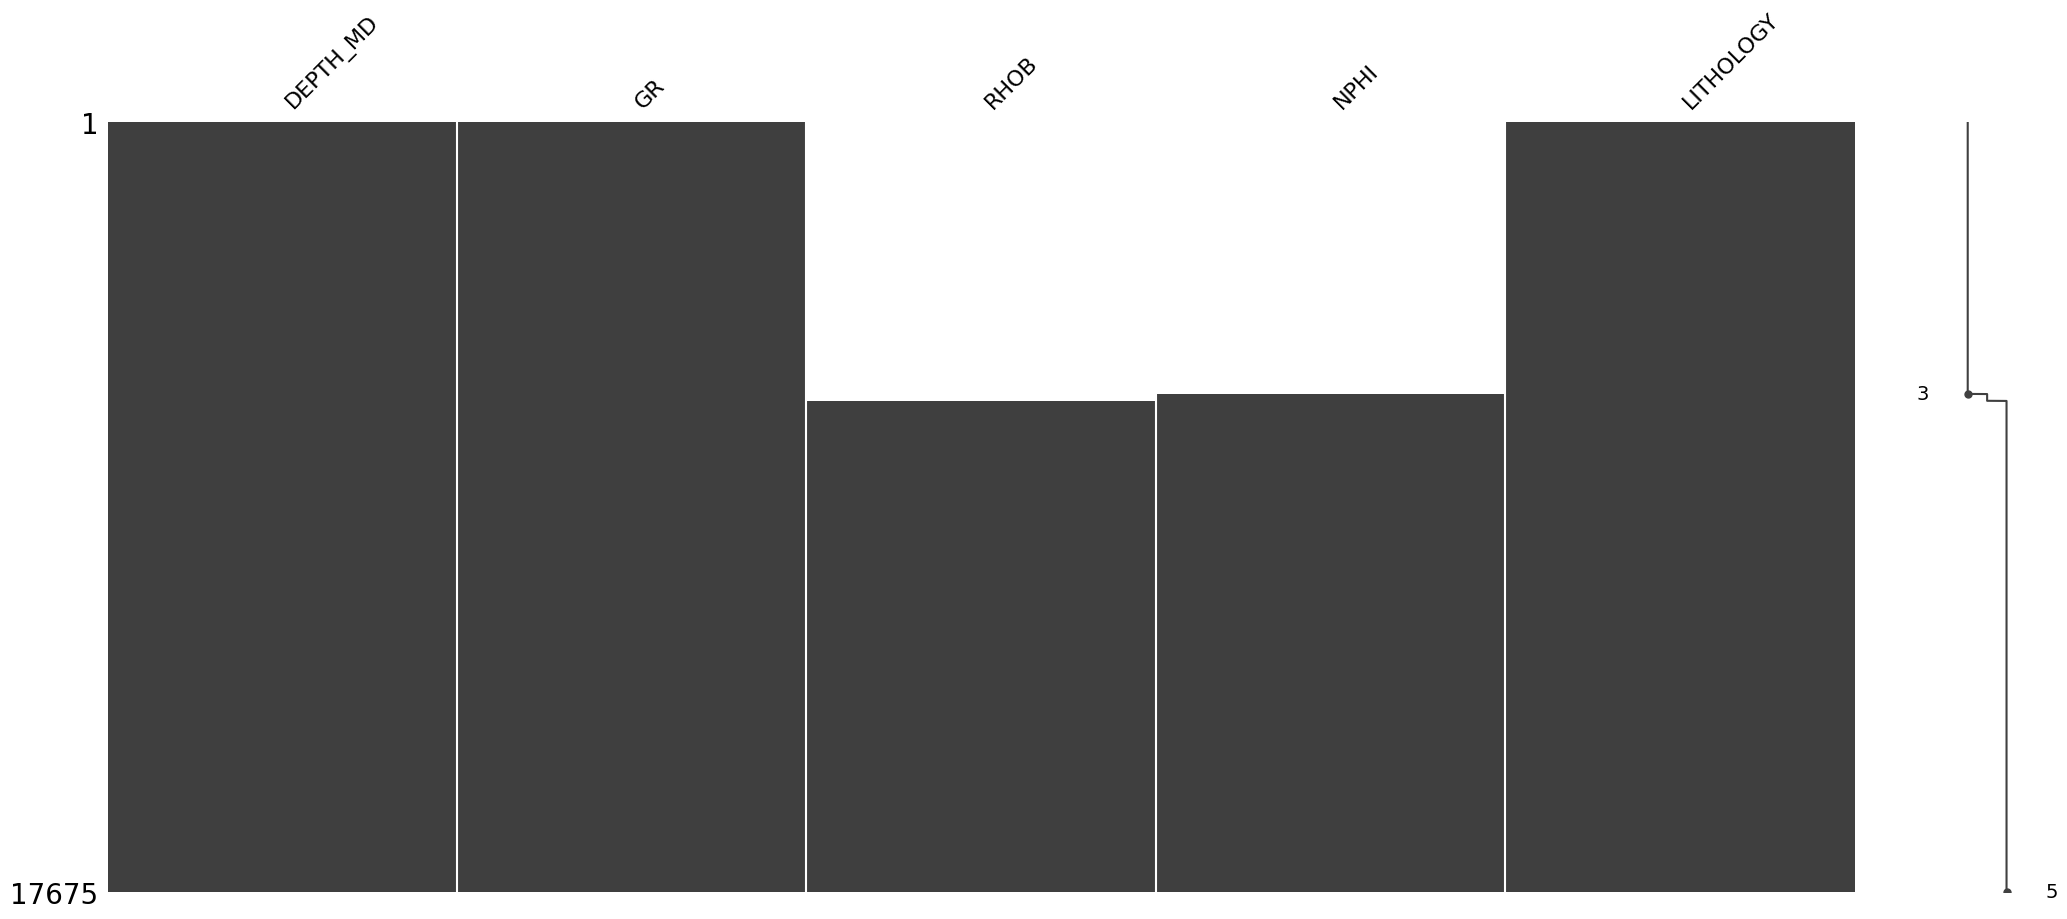

In [75]:
msno.matrix(data)

In [76]:
# Fill null values with the last known non-null value
data.fillna(method='bfill', inplace=True)

In [77]:
data.isnull().sum()

DEPTH_MD     0
GR           0
RHOB         0
NPHI         0
LITHOLOGY    0
dtype: int64

In [78]:
# Define lithology numbers and properties
lithology_numbers = {30000: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 65030: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 70000: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 93000: {'lith':'Basement', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

In [79]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'
df_lith

,lith,lith_num,hatch,color
LITHOLOGY,,,,
30000,Sandstone,1,..,#ffff00
65030,Sandstone/Shale,2,-.,#ffe119
65000,Shale,3,--,#bebebe
80000,Marl,4,,#7cfc00
74000,Dolomite,5,-/,#8080ff
70000,Limestone,6,+,#80ffff
70032,Chalk,7,..,#80ffff
88000,Halite,8,x,#7ddfbe
86000,Anhydrite,9,,#ff80ff


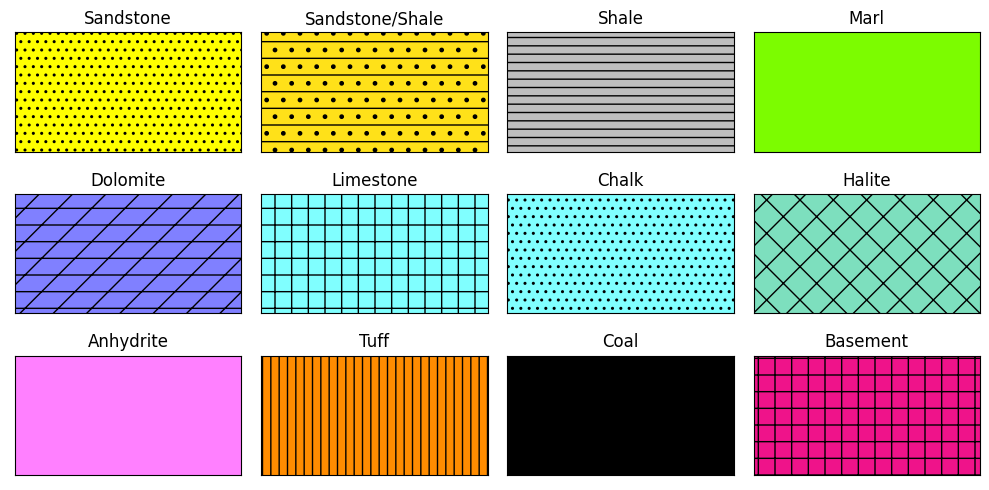

In [80]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=3, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

In [81]:
#create well log graph
def makeplot(well, top_depth, bottom_depth):
    fig, ax = plt.subplots(figsize=(15,10))

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1, sharey = ax1)
    ax3 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
    ax4 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1, sharey = ax1)

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    ax10 = ax1.twiny()
    ax10.xaxis.set_visible(False)
    ax11 = ax2.twiny()
    ax11.xaxis.set_visible(False)
    ax13 = ax4.twiny()
    ax13.xaxis.set_visible(False)

    # Gamma Ray track
    ax1.plot(well["GR"], well['DEPTH_MD'], color = "green", linewidth = 0.5)
    ax1.set_xlabel("Gamma")
    ax1.xaxis.label.set_color("green")
    ax1.set_xlim(0, 200)
    ax1.set_ylabel("Depth (m)")
    ax1.tick_params(axis='x', colors="green")
    ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    ax1.set_xticks([0, 50, 100, 150, 200])

    # Density track
    ax2.plot(well["RHOB"], well['DEPTH_MD'], color = "red", linewidth = 0.5)
    ax2.set_xlabel("Density")
    ax2.set_xlim(1.95, 2.95)
    ax2.xaxis.label.set_color("red")
    ax2.tick_params(axis='x', colors="red")
    ax2.spines["top"].set_edgecolor("red")
    ax2.set_xticks([1.95, 2.45, 2.95])

    # Neutron track placed ontop of density track
    ax3.plot(well["NPHI"], well['DEPTH_MD'], color = "blue", linewidth = 0.5)
    ax3.set_xlabel('Neutron')
    ax3.xaxis.label.set_color("blue")
    ax3.set_xlim(0.45, -0.15)
    ax3.tick_params(axis='x', colors="blue")
    ax3.spines["top"].set_position(("axes", 1.08))
    ax3.spines["top"].set_visible(True)
    ax3.spines["top"].set_edgecolor("blue")
    ax3.set_xticks([0.45,  0.15, -0.15])

    # Lithology track
    ax4.plot(well["LITHOLOGY"], well['DEPTH_MD'], color = "black", linewidth = 0.5)
    ax4.set_xlabel("Lithology")
    ax4.set_xlim(0, 1)
    ax4.xaxis.label.set_color("black")
    ax4.tick_params(axis='x', colors="black")
    ax4.spines["top"].set_edgecolor("black")

    for key in lithology_numbers.keys():
        color = lithology_numbers[key]['color']
        hatch = lithology_numbers[key]['hatch']
        ax4.fill_betweenx(well['DEPTH_MD'], 0, well['LITHOLOGY'], where=(well['LITHOLOGY']==key),
                         facecolor=color, hatch=hatch)
        

    ax4.set_xticks([0, 1])

    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
    for ax in [ax1, ax2, ax4]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
        
        
    for ax in [ax2, ax3, ax4]:
        plt.setp(ax.get_yticklabels(), visible = False)
        
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.15)

C:\Users\AHMED\AppData\Local\Temp\ipykernel_5904\1580545178.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)


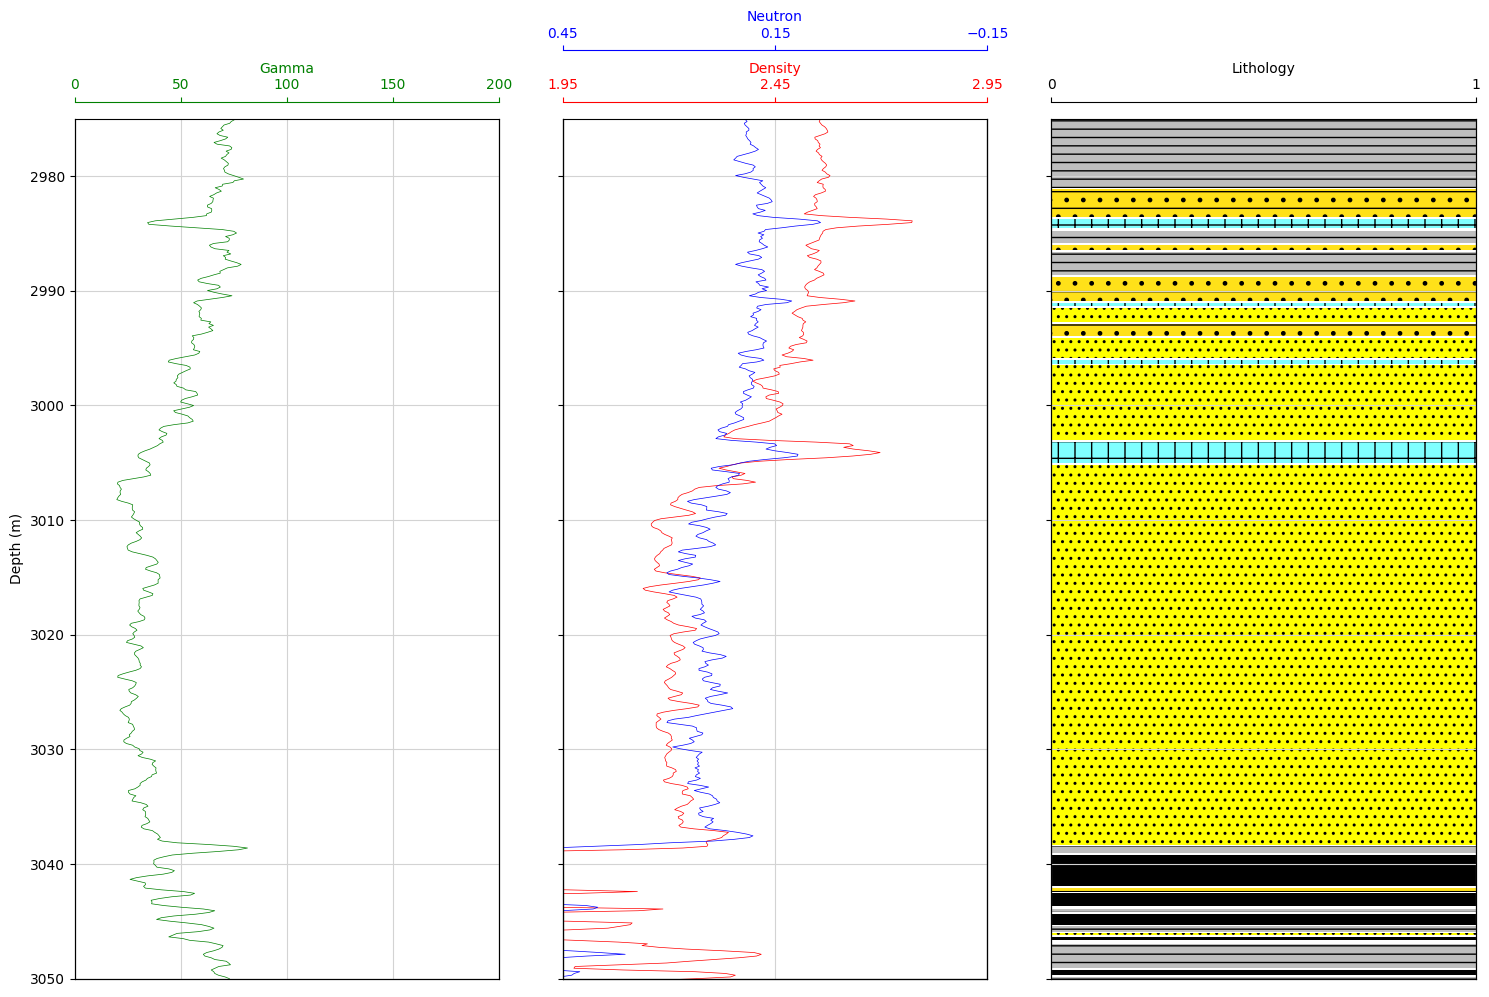

In [82]:
makeplot(data, 2975, 3050)

C:\Users\AHMED\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='RHOB', ylabel='NPHI'>

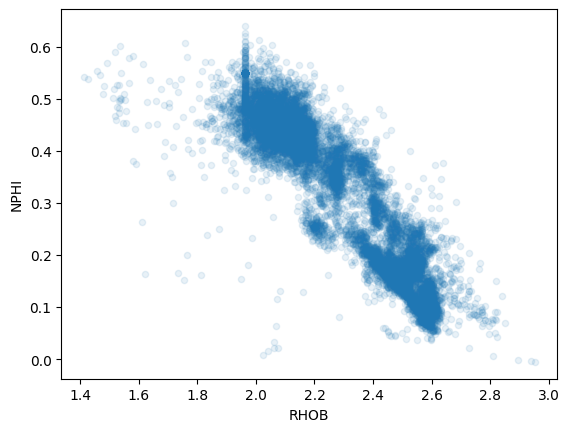

In [83]:
data.plot(kind = 'scatter',x='RHOB',y='NPHI',alpha=0.1)

# Select and train the model

In [86]:
#Split the data into training and testing sets
X = data[['DEPTH_MD', 'GR', 'RHOB', 'NPHI']]
y = data['LITHOLOGY']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
print(f'Shape of X_train {X_train.shape}')
print(f'Shape of y_train {y_train.shape}')
print(f'Shape of X_test {X_test.shape}')
print(f'Shape of y_test {y_test.shape}')

Shape of X_train (14140, 4)
Shape of y_train (14140,)
Shape of X_test (3535, 4)
Shape of y_test (3535,)


# Linear Regression

In [95]:
#Linear Regression
# Define the parameter grid to search over 
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, None]
}

# Create a LinearRegression object
lr = LinearRegression()

#Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(lr, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [-1, None],
                                        'positive': [True, False]},
                   random_state=42)

In [100]:
# Print the best hyperparameters found
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'positive': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}


In [103]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'positive': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
nan {'positive': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
nan {'positive': False, 'n_jobs': -1, 'fit_intercept': False, 'copy_X': True}
nan {'positive': True, 'n_jobs': None, 'fit_intercept': False, 'copy_X': False}
nan {'positive': False, 'n_jobs': -1, 'fit_intercept': False, 'copy_X': False}
nan {'positive': False, 'n_jobs': None, 'fit_intercept': True, 'copy_X': False}
nan {'positive': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': False}
nan {'positive': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': False}
nan {'positive': True, 'n_jobs': None, 'fit_intercept': True, 'copy_X': True}
nan {'positive': False, 'n_jobs': None, 'fit_intercept': False, 'copy_X': False}


C:\Users\AHMED\AppData\Local\Temp\ipykernel_5904\4034813222.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [106]:
lin_reg = LinearRegression(**random_search.best_params_)
lin_reg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [107]:
print(f'Train score is {lin_reg.score(X_train, y_train).round(2)}')
print(f'Test score is {lin_reg.score(X_test , y_test ).round(2)}')

Train score is 0.04
Test score is 0.02


In [108]:
scores = cross_val_score(lin_reg, X_train, y_train , scoring ="neg_mean_squared_error",cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)

In [109]:
print("Scores: ", lin_reg_rmse_scores)
print("Mean: ", lin_reg_rmse_scores.mean())
print("Standard Deviation: ", lin_reg_rmse_scores.std())

Scores:  [9057.73538322 9624.33711041 8252.87970338 9414.67279815 9198.30645192
 8825.50912928 9636.31632516 8737.60554539 8665.66429987 8598.15207616]
Mean:  9001.117882295139
Standard Deviation:  440.45929608170246


In [134]:
#Calculating Prediction
lr_y_pred = lin_reg.predict(X_train)
print('Predicted Value for Linear Regression is : ' , lr_y_pred[:10].round(0))
print('####################################################################')
print('y_train Value for is : ' , y_train.values[:10])

Predicted Value for Linear Regression is :  [62228. 65723. 63751. 65882. 62829. 64197. 63241. 64372. 61843. 65641.]
####################################################################
y_train Value for is :  [65000 65030 65000 65000 65000 65000 65000 65000 30000 65000]


In [135]:
#Calculating Mean Squared Error
final_mse = mean_squared_error(y_train,  lr_y_pred)
final_rmse = np.sqrt(final_mse)
print('Root Mean Squared Error Value is : ', final_rmse)

Root Mean Squared Error Value is :  9005.944320262895


# Decision Tree Regression


In [123]:
# Define the parameter grid to search over 
dt_params = {
    'max_depth': np.random.randint(1,200,10),
    'min_samples_split': np.random.randint(1,20,20),
    'min_samples_leaf': np.random.randint(1,10,10)
}

# Create a Decision Tree object
dt_reg = DecisionTreeRegressor()

#Create a RandomizedSearchCV object
dt_reg_random_search = RandomizedSearchCV(dt_reg, param_distributions=dt_params, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
dt_reg_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([151,   7, 114,  63, 136,  99, 117, 161,   9,  57]),
                                        'min_samples_leaf': array([1, 2, 2, 2, 8, 4, 1, 3, 7, 2]),
                                        'min_samples_split': array([17, 12,  9, 14, 12,  1, 11, 16,  9, 14,  6, 15, 16, 14, 12,  2,  1,
       15, 13,  6])},
                   random_state=42)

In [124]:
# Print the best hyperparameters found
best_params = dt_reg_random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 161}


In [125]:
cvres = dt_reg_random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'min_samples_split': 11, 'min_samples_leaf': 1, 'max_depth': 99}
nan {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 161}
nan {'min_samples_split': 17, 'min_samples_leaf': 2, 'max_depth': 136}
nan {'min_samples_split': 12, 'min_samples_leaf': 8, 'max_depth': 117}
nan {'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 99}
nan {'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 99}
nan {'min_samples_split': 12, 'min_samples_leaf': 1, 'max_depth': 9}
nan {'min_samples_split': 12, 'min_samples_leaf': 2, 'max_depth': 99}
nan {'min_samples_split': 13, 'min_samples_leaf': 2, 'max_depth': 9}
nan {'min_samples_split': 12, 'min_samples_leaf': 1, 'max_depth': 151}


C:\Users\AHMED\AppData\Local\Temp\ipykernel_5904\1311489793.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [126]:
dt_reg = DecisionTreeRegressor(**dt_reg_random_search.best_params_)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=161, min_samples_leaf=2, min_samples_split=6)

In [127]:
print(f'Train score is {dt_reg.score(X_train, y_train).round(2)}')
print(f'Test score is {dt_reg.score(X_test , y_test ).round(2)}')

Train score is 0.97
Test score is 0.86


In [130]:
scores = cross_val_score(dt_reg, X_train, y_train , scoring ="neg_mean_squared_error",cv = 10)
dt_reg_rmse_scores = np.sqrt(-scores)

In [131]:
print("Scores: ", dt_reg_rmse_scores)
print("Mean: ", dt_reg_rmse_scores.mean())
print("Standard Deviation: ", dt_reg_rmse_scores.std())

Scores:  [3424.9748994  3464.61262473 3210.06577242 3912.11245756 4276.28821624
 4382.80872922 3524.37571943 4354.05539343 4060.89348021 3586.73231334]
Mean:  3819.691960596619
Standard Deviation:  409.00531750472237


In [133]:
#Calculating Prediction
dt_y_pred = dt_reg.predict(X_train)
print('Predicted Value for Linear Regression is : ' , dt_y_pred[:10].round(0))
print('####################################################################')
print('y_train Value for is : ' , y_train.values[:10])

Predicted Value for Linear Regression is :  [65000. 65030. 65000. 65000. 65000. 65000. 65000. 65000. 30000. 65000.]
####################################################################
y_train Value for is :  [65000 65030 65000 65000 65000 65000 65000 65000 30000 65000]


In [136]:
#Calculating Mean Squared Error
final_mse = mean_squared_error(y_train,  dt_y_pred)
final_rmse = np.sqrt(final_mse)
print('Root Mean Squared Error Value is : ', final_rmse)

Root Mean Squared Error Value is :  1461.7337547042137


# Random Forest Regression 

In [138]:
# Define the parameter grid to search over 
param_distribs = {
        'n_estimators': np.random.randint(1, 200, 10),
        'max_features': np.random.randint(1, 8, 10),
    }

# Create a Decision Tree object
forest_reg = RandomForestRegressor(random_state=42)

#Create a RandomizedSearchCV object
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
# Fit the RandomizedSearchCV object to the data
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': array([3, 5, 6, 2, 3, 3, 4, 3, 5, 4]),
                                        'n_estimators': array([ 42,  68,  60, 147, 188, 188,   8,  40,  86, 153])},
                   random_state=42, scoring='neg_mean_squared_error')

In [139]:
# Print the best hyperparameters found
best_params = rnd_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 147, 'max_features': 3}


In [140]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3105.4892874082843 {'n_estimators': 147, 'max_features': 5}
3070.2035822753733 {'n_estimators': 147, 'max_features': 3}
3100.314867006318 {'n_estimators': 42, 'max_features': 3}
3076.926735546488 {'n_estimators': 188, 'max_features': 3}
3076.926735546488 {'n_estimators': 188, 'max_features': 3}
3105.969816533214 {'n_estimators': 153, 'max_features': 2}
3099.460535173498 {'n_estimators': 60, 'max_features': 6}
3105.1261530586894 {'n_estimators': 42, 'max_features': 5}
3105.1261530586894 {'n_estimators': 42, 'max_features': 5}
3100.314867006318 {'n_estimators': 42, 'max_features': 3}


In [141]:
forest_reg = RandomForestRegressor(**rnd_search.best_params_)
forest_reg.fit(X_train,y_train)

RandomForestRegressor(max_features=3, n_estimators=147)

In [142]:
print(f'Train score is {forest_reg.score(X_train, y_train).round(2)}')
print(f'Test score is {forest_reg.score(X_test , y_test ).round(2)}')

Train score is 0.98
Test score is 0.91


In [143]:
scores = cross_val_score(forest_reg, X_train, y_train , scoring ="neg_mean_squared_error",cv = 10)
forest_reg_rmse_scores = np.sqrt(-scores)

In [144]:
print("Scores: ", forest_reg_rmse_scores)
print("Mean: ", forest_reg_rmse_scores.mean())
print("Standard Deviation: ", forest_reg_rmse_scores.std())

Scores:  [2622.44658037 2920.30654355 2589.87202979 3127.52732671 3392.45011958
 3574.42116927 3061.03007457 3158.6541918  3468.44647134 2549.14719692]
Mean:  3046.4301703902715
Standard Deviation:  353.18424945759705


In [145]:
#Calculating Prediction
forest_reg_y_pred = forest_reg.predict(X_train)
print('Predicted Value for Random Forest is : ' , forest_reg_y_pred[:10].round(0))
print('####################################################################')
print('y_train Value for is : ' , y_train.values[:10])

Predicted Value for Linear Regression is :  [65000. 65030. 65102. 65000. 65000. 65000. 65034. 65000. 30272. 65000.]
####################################################################
y_train Value for is :  [65000 65030 65000 65000 65000 65000 65000 65000 30000 65000]


In [146]:
#Calculating Mean Squared Error
final_mse = mean_squared_error(y_train,  forest_reg_y_pred)
final_rmse = np.sqrt(final_mse)
print('Root Mean Squared Error Value is : ', final_rmse)

Root Mean Squared Error Value is :  1129.0125510972048


# Evaluation by Random forest regression

In [150]:
y_pred = forest_reg.predict(X_test)
print('Predicted Value for Random Forest is : ' , y_pred[:10].round(0))
print('####################################################################')
print('y_test Value for is : ' , y_test.values[:10])

Predicted Value for Random Forest is :  [70408. 70000. 73939. 65000. 70008. 65000. 65204. 65000. 65000. 70000.]
####################################################################
y_test Value for is :  [80000 70000 74000 65000 70032 65000 65000 65000 65000 70000]


In [151]:
#Calculating Mean Squared Error
final_mse = mean_squared_error(y_test,  y_pred)
final_rmse = np.sqrt(final_mse)
print('Root Mean Squared Error Value is : ', final_rmse)

Root Mean Squared Error Value is :  2627.599827292688
